# Preprocessing Data Input Tables Site Specific (SSPS) RShiny Demo App
Notes:
- asdf

In [1]:
# working with data
import os
import numpy as np
import pandas as pd
import geopandas as gpd # the library that lets us read in shapefiles

# visulizaiton
import seaborn as sns
import matplotlib.pyplot as plt
import geoplot as gplt # for plotting maps

# Cleanup
from datetime import datetime
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook

In [2]:
# Setting work directory
cwd = os.getcwd()
print("current directory = " + cwd)

os.chdir("../NotEssentialData")
print("new directory = " + os.path.abspath(os.curdir))

current directory = C:\Users\rjame\Documents\WSWC Documents\WaDE Side Projects Local\20221017 Rshiny SS Demo\SSPS_Demo\bonus code
new directory = C:\Users\rjame\Documents\WSWC Documents\WaDE Side Projects Local\20221017 Rshiny SS Demo\SSPS_Demo\NotEssentialData


## Clean Sites Data

In [3]:
# Sites Input
fileInput = "Sites.csv"
dfs = pd.read_csv(fileInput)
print(len(dfs))
dfs.head(1)

22920


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV
0,CAssps_S1062,SO. CAL. EDISON CO.-SANTA CATALINA,CA1910006,Unspecified,-118.434483,33.382597,POU,Delivered,Delivered,Monthly,Agriculture Irrigation,Unspecified,Cumulative Delivered_Monthly_Agricultural_Unsp...


In [4]:
# Clean input.  Remove no value sites

dfs = dfs.drop_duplicates() # Drop Duplicate Rows
dfs = dfs.dropna(subset=['VariableSpecificCV']).reset_index(drop=True) # drop no value sites
dfs = dfs.replace(np.nan, "")  # Replaces NaN values with blank.
print(len(dfs))
dfs.head(1)

22920


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV
0,CAssps_S1062,SO. CAL. EDISON CO.-SANTA CATALINA,CA1910006,Unspecified,-118.434483,33.382597,POU,Delivered,Delivered,Monthly,Agriculture Irrigation,Unspecified,Cumulative Delivered_Monthly_Agricultural_Unsp...


In [5]:
# Fixing blank WaDENameS
def updateWaDENameS(Val):
    Val = str(Val).strip()
    if Val == "" or pd.isnull(Val) or Val == "":
        outString = "Unspecified"
    else:
        outString = Val
    return outString

dfs['WaDENameS'] = dfs.apply(lambda row: updateWaDENameS(row['WaDENameS']), axis=1)
for x in dfs['WaDENameS'].sort_values().unique():
    print(f'"' + x + '",')

"City / District",
"Lake",
"Reservoir",
"Stream Gage",
"Surface Water Point",
"Unspecified",
"Well / Pump / Spring / Groundwater Point",


In [6]:
# Fixing blank WaDENameWS
def updateWaDENameWS(Val):
    Val = str(Val).strip()
    if Val == "" or pd.isnull(Val) or Val == "":
        outString = "Unspecified"
    else:
        outString = Val
    return outString

dfs['WaDENameWS'] = dfs.apply(lambda row: updateWaDENameWS(row['WaDENameWS']), axis=1)
for x in dfs['WaDENameWS'].sort_values().unique():
    print(f'"' + x + '",')

"Groundwater",
"Reuse",
"Surface Water",
"Surface and Groundwater",
"Unspecified",


In [7]:
# Fixing blank WaDENameBU
def updateWaDENameBU(Val):
    Val = str(Val).strip()
    if Val == "" or pd.isnull(Val) or Val == "":
        outString = "Unspecified"
    else:
        outString = Val
    return outString

dfs['WaDENameBU'] = dfs.apply(lambda row: updateWaDENameBU(row['WaDENameBU']), axis=1)
for x in dfs['WaDENameBU'].sort_values().unique():
    print(f'"' + x + '",')

"Agriculture Irrigation",
"Commercial/Industrial",
"Domestic",
"Geothermal",
"Hydroelectric",
"Mining",
"Municipal Irrigation",
"Other",
"Public Supply",
"Unspecified",


In [8]:
# Fixing blank WaDENameV
def updateWaDENameV(Val):
    Val = str(Val).strip()
    if Val == "" or pd.isnull(Val) or Val == "":
        outString = "Unspecified"
    else:
        outString = Val
    return outString

dfs['WaDENameV'] = dfs.apply(lambda row: updateWaDENameBU(row['WaDENameV']), axis=1)
for x in dfs['WaDENameV'].sort_values().unique():
    print(f'"' + x + '",')

"Delivered",
"Produced",
"Return",
"Withdrawal",


In [9]:
# check TimeStep
for x in dfs['TimeStep'].sort_values().unique():
    print(f'"' + x + '",')

"Annual",
"Monthly",


In [10]:
# add State field

def createState(Val):
    Val = Val.strip()
    outString = Val[:2]
    return outString

dfs['State'] = dfs.apply(lambda row: createState(row['SiteUUID']), axis=1)
for x in dfs['State'].sort_values().unique():
    print(f'"' + x + '",')

"CA",
"NJ",
"NM",
"TX",
"UT",


In [11]:
# Groupby SiteUUID
#dfs = dfs.groupby(['SiteUUID']).agg(lambda x: ", ".join([str(elem) for elem in (list(set(x))) if elem!=""])).replace(np.nan, "").reset_index()
dfs = dfs.groupby(['SiteUUID']).agg(lambda x: ", ".join([str(elem) for elem in (list(set(x)))])).replace(np.nan, "").reset_index()
print(len(dfs))
dfs.head(1)

13076


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State
0,CAssps_S1,NORRIS CANYON PROPERTY OWNERS ASSN,CA0103040,Unspecified,-122.027303326,37.7343636266,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Single Family Res...,CA


In [12]:
# count num of VariableSpecificCV after groupby

def countNumVar(Val):
    Val = list(Val.split(","))
    if Val == [""]:
        ValLen = 0
    else:
        ValLen = len(Val)
    return ValLen

dfs['CountVar'] = dfs.apply(lambda row: countNumVar(row['VariableSpecificCV']), axis=1)
for x in dfs['CountVar'].sort_values().unique():
    print(f'"' + str(x) + '",')

"1",
"2",
"3",
"4",
"5",
"6",
"7",
"8",
"9",
"10",
"11",
"12",


#### Attach Additional Data

In [13]:
# attach timeframe based on SiteUUID

fileInput = "Sites_timeframe.csv"
dfstf = pd.read_csv(fileInput)
dfs = pd.merge(dfs, dfstf, on='SiteUUID', how='left')
print(len(dfs))
dfs.head(1)

13076


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd
0,CAssps_S1,NORRIS CANYON PROPERTY OWNERS ASSN,CA0103040,Unspecified,-122.027303326,37.7343636266,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Single Family Res...,CA,2,2014-01-01,2016-12-31


In [14]:
# attach populationserved based on SiteUUID

fileInput = "Sites_populationserved.csv"
dfsps = pd.read_csv(fileInput)
dfs = pd.merge(dfs, dfsps, on='SiteUUID', how='left')
print(len(dfs))
dfs.head(1)

13076


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed
0,CAssps_S1,NORRIS CANYON PROPERTY OWNERS ASSN,CA0103040,Unspecified,-122.027303326,37.7343636266,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Single Family Res...,CA,2,2014-01-01,2016-12-31,50.0,50.0


In [15]:
# Convert PopulationServed to numeric.
# Convert to int, ignore NA values.
dfs['minPopulationServed'] = pd.to_numeric(dfs['minPopulationServed'], errors='coerce')
dfs['minPopulationServed'] = dfs['minPopulationServed'].astype('Int64')

dfs['maxPopulationServed'] = pd.to_numeric(dfs['maxPopulationServed'], errors='coerce')
dfs['maxPopulationServed'] = dfs['maxPopulationServed'].astype('Int64')

print(f'min:', dfs['minPopulationServed'].min())
print(f'min:', dfs['minPopulationServed'].max())
print(f'max:', dfs['maxPopulationServed'].min())
print(f'max:', dfs['maxPopulationServed'].max())

min: 0
min: 4061504
max: 0
max: 4061504


In [16]:
# attach geometry based on SiteUUID

fileInput = "Sites_geometry.csv"
dfgeo = pd.read_csv(fileInput)
dfs = pd.merge(dfs, dfgeo, on='SiteUUID', how='left')
print(len(dfs))
dfs.head(1)

13076


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite_x,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed,PODorPOUSite_y,geometry
0,CAssps_S1,NORRIS CANYON PROPERTY OWNERS ASSN,CA0103040,Unspecified,-122.027303326,37.7343636266,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Single Family Res...,CA,2,2014-01-01,2016-12-31,50,50,POU,POLYGON ((-122.02636000038909 37.7379799998779...


#### Fixes

In [17]:
# Temp Fix

# remove lat & long entries that contain a ','
dfs = dfs[dfs['Latitude'].str.contains(',') == False]
dfs = dfs[dfs['Longitude'].str.contains(',') == False]

# Ensure long is < 0 and > -125 (few ID sites out of bounds)
# Ensure lat is > 10 and < 50 (few MT sites out of bounds).
dfs['Latitude'] = pd.to_numeric(dfs['Latitude'], errors='coerce')
dfs['Longitude'] = pd.to_numeric(dfs['Longitude'], errors='coerce')
dfs = dfs[(dfs['Latitude'].astype(int) > 10) & (dfs['Latitude'].astype(int) < 50)]
dfs = dfs[(dfs['Longitude'].astype(int) < 0) & (dfs['Longitude'].astype(int) > -125)]

print(len(dfs))
dfs.head(1)

13076


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite_x,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed,PODorPOUSite_y,geometry
0,CAssps_S1,NORRIS CANYON PROPERTY OWNERS ASSN,CA0103040,Unspecified,-122.027303,37.734364,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Single Family Res...,CA,2,2014-01-01,2016-12-31,50,50,POU,POLYGON ((-122.02636000038909 37.7379799998779...


In [18]:
# # Issue of ESRI Shapefile does not support datetime fields

# dfs['minTimeFrameStart'] = pd.to_datetime(dfs['minTimeFrameStart'], errors = 'coerce')
# dfs['maxTimeFrameEnd'] = pd.to_datetime(dfs['maxTimeFrameEnd'], errors = 'coerce')
# print(dfs['minTimeFrameStart'].min())
# print(dfs['maxTimeFrameEnd'].max())

In [19]:
#Inspect output
dfs.head()

,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite_x,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed,PODorPOUSite_y,geometry
0,CAssps_S1,NORRIS CANYON PROPERTY OWNERS ASSN,CA0103040,Unspecified,-122.027303,37.734364,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Single Family Res...,CA,2,2014-01-01,2016-12-31,50,50,POU,POLYGON ((-122.02636000038909 37.7379799998779...
1,CAssps_S10,ALAMEDA COUNTY FAIRGROUNDS,CA0105020,Unspecified,-121.887236,37.661659,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Municipal Irrigation, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Multi Family Resi...,CA,3,2013-01-01,2016-12-31,82,82,POU,POLYGON ((-121.88789999944797 37.6622299998386...
2,CAssps_S100,FOREST RANCH CHARTER SCHOOL,CA0400079,Unspecified,-121.667045,39.884413,POU,Produced,Produced,Monthly,Unspecified,Groundwater,Cumulative Produced_Monthly_Total_Groundwater,CA,1,2014-01-01,2016-12-31,146,146,POU,POLYGON ((-121.6677100001466 39.88542000026367...
3,CAssps_S1000,LANCASTER PARK MOBILE HOME PARK,CA1900038,Unspecified,-118.131822,34.746266,POU,Produced,Produced,Monthly,Unspecified,Groundwater,Cumulative Produced_Monthly_Total_Groundwater,CA,1,2016-01-01,2016-12-31,61,61,POU,POLYGON ((-118.13252999981032 34.7459100000641...
4,CAssps_S1001,PETER PITCHESS HONOR RANCHO DETN. CTR,CA1900046,Unspecified,-118.595689,34.465742,POU,Produced,Produced,Monthly,Unspecified,Groundwater,Cumulative Produced_Monthly_Total_Groundwater,CA,1,2013-01-01,2016-12-31,7500,7500,POU,MULTIPOLYGON (((-118.60232725927787 34.4652590...


In [20]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13076 entries, 0 to 13075
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SiteUUID             13076 non-null  object 
 1   SiteName             13076 non-null  object 
 2   SiteNativeID         13076 non-null  object 
 3   WaDENameS            13076 non-null  object 
 4   Longitude            13076 non-null  float64
 5   Latitude             13076 non-null  float64
 6   PODorPOUSite_x       13076 non-null  object 
 7   VariableCV           13076 non-null  object 
 8   WaDENameV            13076 non-null  object 
 9   TimeStep             13076 non-null  object 
 10  WaDENameBU           13076 non-null  object 
 11  WaDENameWS           13076 non-null  object 
 12  VariableSpecificCV   13076 non-null  object 
 13  State                13076 non-null  object 
 14  CountVar             13076 non-null  int64  
 15  minTimeFrameStart    13076 non-null 

## Create Output Sites xlsx file
- only points from dfs

In [21]:
df_sites = dfs.copy()
df_sites = df_sites[df_sites['geometry'].isnull()].reset_index(drop=True)
df_sites = df_sites.drop(['geometry', 'PODorPOUSite_y'], axis=1)
df_sites = df_sites.rename(columns={"PODorPOUSite_x": "PODorPOUSite"})
print(len(df_sites))
df_sites.head(1)

4060


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed
0,NMssps_S1,Unspecified,1.0,Unspecified,-106.273851,34.941213,POD,Withdrawal,Withdrawal,Annual,Unspecified,Groundwater,Withdrawal_Annual_Unspecified_Groundwater,NM,1,2010-01-01,2015-12-31,58,100


## Create Output Polygon Shapefile
- only polygons from dfs

In [22]:
df_poly = dfs.copy()
df_poly = df_poly[df_poly['geometry'].notnull()].reset_index(drop=True)
df_poly = df_poly.drop(['PODorPOUSite_y'], axis=1)
df_poly = df_poly.rename(columns={"PODorPOUSite_x": "PODorPOUSite"})
print(len(df_poly))
df_poly.head(1)

9016


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed,geometry
0,CAssps_S1,NORRIS CANYON PROPERTY OWNERS ASSN,CA0103040,Unspecified,-122.027303,37.734364,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Single Family Res...,CA,2,2014-01-01,2016-12-31,50,50,POLYGON ((-122.02636000038909 37.7379799998779...


In [23]:
# drop empty geometry rows
df_poly = df_poly.dropna(subset=['geometry'])
print(len(df_poly))
df_poly.head(1)

9016


,SiteUUID,SiteName,SiteNativeID,WaDENameS,Longitude,Latitude,PODorPOUSite,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed,geometry
0,CAssps_S1,NORRIS CANYON PROPERTY OWNERS ASSN,CA0103040,Unspecified,-122.027303,37.734364,POU,"Produced, Delivered","Produced, Delivered",Monthly,"Unspecified, Public Supply","Unspecified, Groundwater",Cumulative Delivered_Monthly_Single Family Res...,CA,2,2014-01-01,2016-12-31,50,50,POLYGON ((-122.02636000038909 37.7379799998779...


In [24]:
# convert from object string -to- geometry
# covert to geodataframe
df_poly['geometry'] = gpd.GeoSeries.from_wkt(df_poly['geometry'], crs="EPSG:4326")
gdf_poly = gpd.GeoDataFrame(df_poly, geometry=df_poly['geometry'], crs="EPSG:4326") # covert to geodataframe
gdf_poly['geometry'] = gdf_poly.simplify(0.001) # simplify the geometry. Lower the number the larger the exported file.

## Create Output Link Shapefile
- covert it to a polygon of lines shapefile
- update df_sites with 'HasLinksColor' feature if links exist.

In [25]:
# Raw POU start and POD end site Input
fileInput = "POUstart_PODend_Sites.csv"
dfl1 = pd.read_csv(fileInput)

# Raw POD start and POU end site Input
fileInput = "PODstart_POUend_Sites.csv"
dfl2 = pd.read_csv(fileInput)

dfl = pd.concat([dfl1, dfl2]).reset_index(drop=True)

#dfl = dfl.drop_duplicates().reset_index(drop=True) # Drop Duplicate Rows
#dfl = dfl.replace(np.nan, "")  # Replaces NaN values with blank.
print(len(dfl))
dfl.head(1)

3860


,startSiteUUID,startPODorPOUSite,startSiteName,startLat,startLong,endSiteUUID,endPODorPOUSite,endSiteName,endLat,endLong
0,NMssps_S1001,POU,TOP OF THE WORLD WATER ASSOCIATION CORP,35.418747,-108.303617,NMssps_S349,POD,Unspecified,35.419413,-108.304756


In [26]:
# attach dfs info so links will work with filters

dfl = pd.merge(dfl, dfs, left_on='endSiteUUID', right_on='SiteUUID', how='left')
dfl = dfl.drop(['SiteUUID', 'SiteName', 'SiteNativeID', 'Longitude', 'Latitude', 'geometry', 'PODorPOUSite_y', 'PODorPOUSite_x'], axis=1)
print(len(dfl))
dfl.head(1)

3860


,startSiteUUID,startPODorPOUSite,startSiteName,startLat,startLong,endSiteUUID,endPODorPOUSite,endSiteName,endLat,endLong,WaDENameS,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed
0,NMssps_S1001,POU,TOP OF THE WORLD WATER ASSOCIATION CORP,35.418747,-108.303617,NMssps_S349,POD,Unspecified,35.419413,-108.304756,Unspecified,Withdrawal,Withdrawal,Annual,Unspecified,Groundwater,Withdrawal_Annual_Unspecified_Groundwater,NM,1.0,2010-01-01,2015-12-31,115,125


In [27]:
# drop empty rows
dfl = dfl.dropna(subset=['WaDENameS']).reset_index(drop=True)
print(len(dfl))
dfl.head(1)

3763


,startSiteUUID,startPODorPOUSite,startSiteName,startLat,startLong,endSiteUUID,endPODorPOUSite,endSiteName,endLat,endLong,WaDENameS,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed
0,NMssps_S1001,POU,TOP OF THE WORLD WATER ASSOCIATION CORP,35.418747,-108.303617,NMssps_S349,POD,Unspecified,35.419413,-108.304756,Unspecified,Withdrawal,Withdrawal,Annual,Unspecified,Groundwater,Withdrawal_Annual_Unspecified_Groundwater,NM,1.0,2010-01-01,2015-12-31,115,125


In [28]:
from shapely.geometry import LineString # To create line geometries that can be used in a GeoDataFrame

def createLine(sLong, sLat, eLong, eLat):
    start, end = [(sLong, sLat), (eLong, eLat)]
    line = LineString([start, end])
    return line

dfl['geometry'] = dfl.apply(lambda row: createLine(row['startLong'], row['startLat'], row['endLong'], row['endLat']), axis=1)
dfl.head(1)

C:\Users\rjame\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,startSiteUUID,startPODorPOUSite,startSiteName,startLat,startLong,endSiteUUID,endPODorPOUSite,endSiteName,endLat,endLong,WaDENameS,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed,geometry
0,NMssps_S1001,POU,TOP OF THE WORLD WATER ASSOCIATION CORP,35.418747,-108.303617,NMssps_S349,POD,Unspecified,35.419413,-108.304756,Unspecified,Withdrawal,Withdrawal,Annual,Unspecified,Groundwater,Withdrawal_Annual_Unspecified_Groundwater,NM,1.0,2010-01-01,2015-12-31,115,125,"LINESTRING (-108.303616831 35.4187465212, -108..."


In [29]:
# covert to geodataframe
gdf_lines = gpd.GeoDataFrame(dfl, geometry='geometry', crs="EPSG:4326")
gdf_lines.head(1)

,startSiteUUID,startPODorPOUSite,startSiteName,startLat,startLong,endSiteUUID,endPODorPOUSite,endSiteName,endLat,endLong,WaDENameS,VariableCV,WaDENameV,TimeStep,WaDENameBU,WaDENameWS,VariableSpecificCV,State,CountVar,minTimeFrameStart,maxTimeFrameEnd,minPopulationServed,maxPopulationServed,geometry
0,NMssps_S1001,POU,TOP OF THE WORLD WATER ASSOCIATION CORP,35.418747,-108.303617,NMssps_S349,POD,Unspecified,35.419413,-108.304756,Unspecified,Withdrawal,Withdrawal,Annual,Unspecified,Groundwater,Withdrawal_Annual_Unspecified_Groundwater,NM,1.0,2010-01-01,2015-12-31,115,125,"LINESTRING (-108.30362 35.41875, -108.30476 35..."


#### Mark what Sites & Polygons have attached sites

In [30]:
# Site & Polygon related
# Mark what sites & Polygons have attached sites

SiteWLinkList = dfl['startSiteUUID'].tolist()
def checkSiteHasLinksFunc(val):
    if val == '' or pd.isnull(val):
        outString = 'black'
    else:
        if val in SiteWLinkList:
            outString = 'limegreen'
        else:
            outString = 'black'
    return outString

df_sites['HasLinksColor'] = df_sites.apply(lambda row: checkSiteHasLinksFunc(row['SiteUUID']), axis=1)
gdf_poly['HasLinksColor'] = gdf_poly.apply(lambda row: checkSiteHasLinksFunc(row['SiteUUID']), axis=1)

In [31]:
df_sites['HasLinksColor'].unique()

array(['black', 'limegreen'], dtype=object)

In [32]:
gdf_poly['HasLinksColor'].unique()

array(['black', 'limegreen'], dtype=object)

## Export Files
- Sites_v2_sites.xlsx
- Sites_v2_poly.shp
- Lines.shp

In [33]:
# Site points to xlsx
df_sites.to_excel('Sites_v2_sites.xlsx', index=False)

# Polygon to shapefile
gdf_poly.to_file("Sites_v2_poly.shp") # export shape file

# Line to shapefile
gdf_lines.to_file("Lines.shp") # export shape file

C:\Users\rjame\AppData\Local\Temp\ipykernel_6676\539431629.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_poly.to_file("Sites_v2_poly.shp") # export shape file
C:\Users\rjame\AppData\Local\Temp\ipykernel_6676\539431629.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_lines.to_file("Lines.shp") # export shape file


## Mapping to Validate Sites / Polygons

<AxesSubplot: >

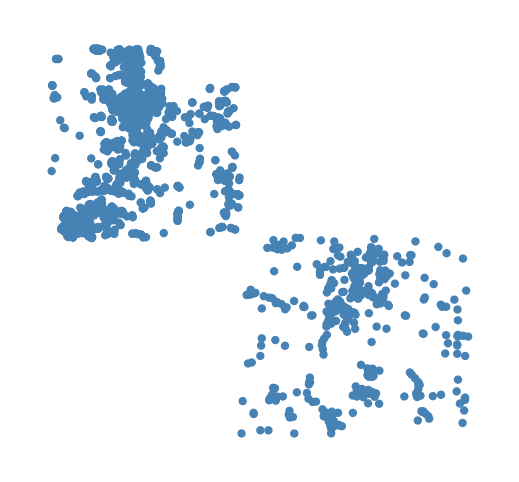

In [34]:
# geoplot map points
# convert dataframe to geodataframe
gdf_sites = gpd.GeoDataFrame(df_sites, geometry=gpd.points_from_xy(df_sites.Longitude.astype(float), df_sites.Latitude.astype(float)), crs="EPSG:4326")
gplt.pointplot(gdf_sites)

C:\Users\rjame\anaconda3\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot: >

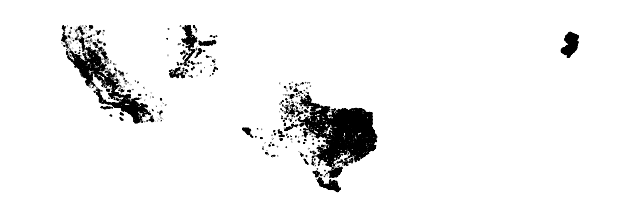

In [35]:
# geoplot map polygons
gplt.polyplot(gdf_poly)

<AxesSubplot: >

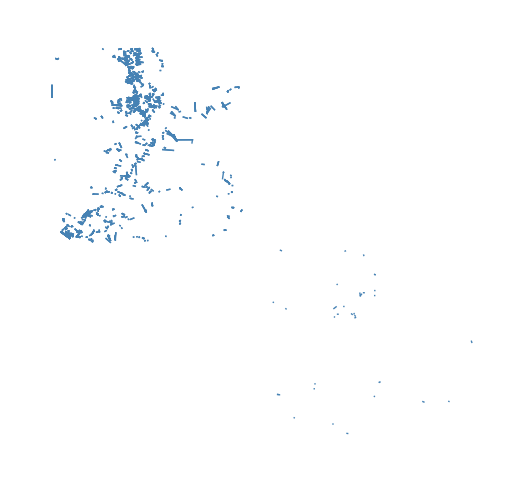

In [36]:
# geoplot map Lines
gplt.sankey(gdf_lines)

## Analytic Visuals to Evaluate Data & Results

In [42]:
# check min and max values for minTimeFrameStart & minPopulationServed
print(dfs['minTimeFrameStart'].min())
print(dfs['maxTimeFrameEnd'].max())

print(dfs['minPopulationServed'].min())
print(dfs['minPopulationServed'].max())

1955-01-01
2021-12-31
0
4061504


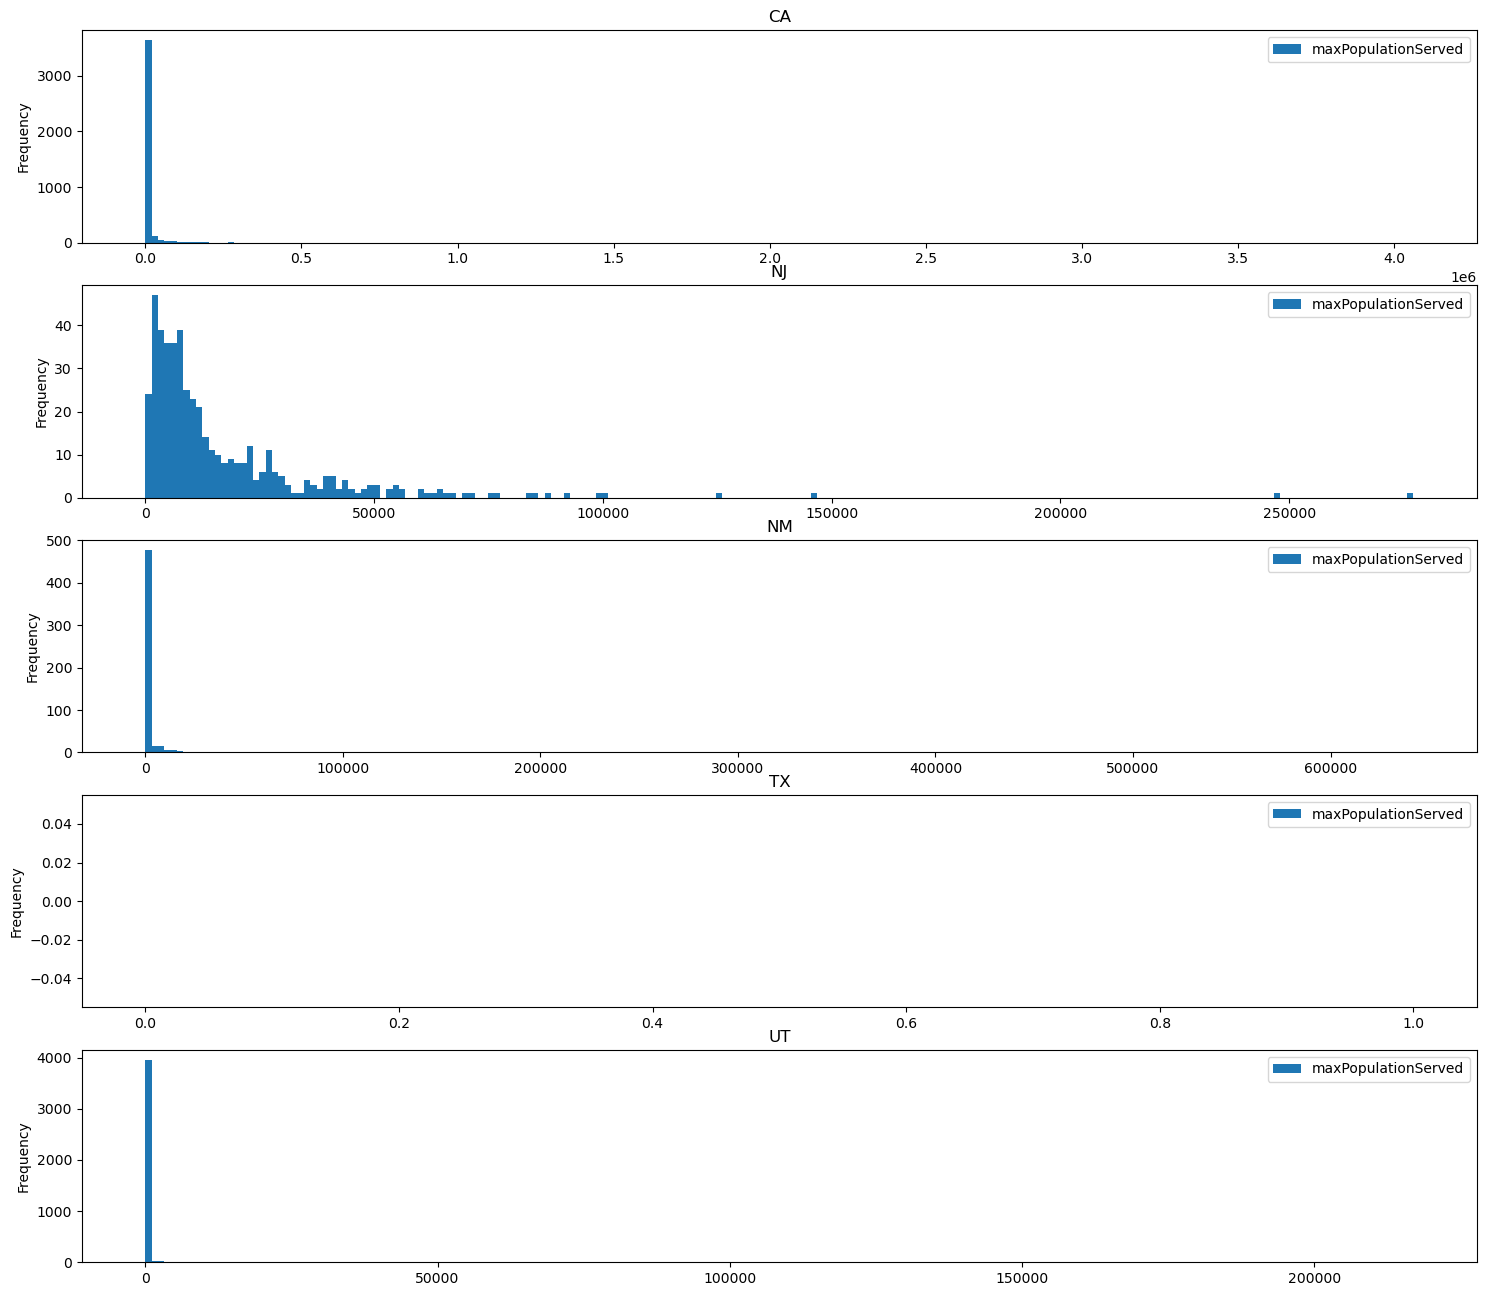

In [37]:
# Pandas Distribution Plot of maxPopulationServed per state
ax = dfs.plot.hist(column="maxPopulationServed", by="State", bins=200, figsize=(18, 16))

13076


<AxesSubplot: xlabel='State', ylabel='maxPopulationServed'>

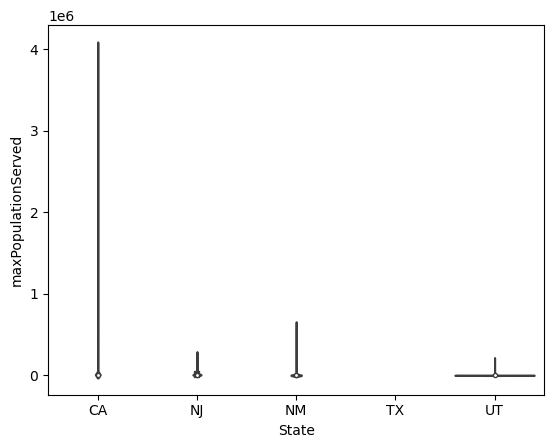

In [38]:
# Seaborn Violin Plot for maxPopulationServed per state
# has to use float values
dfs2 = dfs[['State', 'maxPopulationServed']].copy()
dfs2 = dfs2.astype({'maxPopulationServed': float})
print(len(dfs2))

sns.violinplot(data=dfs2, x="State", y="maxPopulationServed")

In [39]:
print(dfs.groupby(["State"])["maxPopulationServed"].median())
print(dfs.groupby(["State"])["maxPopulationServed"].mean())
print(dfs.groupby(["State"])["maxPopulationServed"].mode())

State
CA     198.0
NJ    8847.0
NM     260.0
TX      <NA>
UT       0.0
Name: maxPopulationServed, dtype: Float64
State
CA    10103.894192
NJ    17252.756356
NM     3399.783178
TX            <NA>
UT      280.223122
Name: maxPopulationServed, dtype: Float64


AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [ ]:
# # what does site CAssps_S2226 have a Water Source Type: c("Groundwater", "Surface Water", "Unspecified") in the mape, but only Groundwtaer and Unspecifed for timeseries?
# dfcheck = dfs.copy()
# dfcheck = dfcheck[dfcheck['SiteUUID']=='CAssps_S2226']
# dfcheck.to_excel('dfcheck.xlsx', index=False)
# print(len(dfcheck))
# dfcheck

In [ ]:
# fileInput = "G:\Shared drives\WaDE Data\California\SS_PublicSupplyWaterUse\ProcessedInputData\Sites.csv"
# dfc2 = pd.read_csv(fileInput)
# dfc2 = dfc2[dfc2['SiteUUID']=='CAssps_S2226']
# dfc2

In [ ]:
# fileInput = "G:\Shared drives\WaDE Data\California\SS_PublicSupplyWaterUse\RawInputData\P_caSSMain.csv"
# #dfc3 = pd.read_csv(fileInput)
# dfc3 = dfc3[dfc3['in_SiteNativeID']=='CA3610032']
# dfc3['in_WaterSourceTypeCV'].unique()

In [ ]:
# dfc3 = dfc3[dfc3['in_WaterSourceTypeCV']=='Surface Water']
# dfc3